In [1]:
import json

with open('/home/ojaswa/aarya/research_papers_implementation/NeuS/public_data/mixamo/transforms_train.json') as f:
    data = json.load(f)

data

{'camera_angle_x': 0.6941835880279541,
 'camera_angle_y': 0.47327831387519836,
 'fl_x': 2653.8671875,
 'fl_y': 2653.8671875,
 'k1': 0.0,
 'k2': 0.0,
 'p1': 0.0,
 'p2': 0.0,
 'cx': 960.0,
 'cy': 540.0,
 'w': 1920.0,
 'h': 1080.0,
 'aabb_scale': 8,
 'frames': [{'file_path': 'train\\0001.png',
   'transform_matrix': [[-0.272744745016098,
     0.883466362953186,
     -0.38091692328453064,
     -1.5488148927688599],
    [-0.9620864391326904,
     -0.2504565119743347,
     0.10798727720975876,
     0.4390781819820404],
    [0.0, 0.39592787623405457, 0.9182816743850708, 4.7337493896484375],
    [0.0, 0.0, 0.0, 1.0]]},
  {'file_path': 'train\\0002.png',
   'transform_matrix': [[0.9971421957015991,
     -0.0735258236527443,
     -0.01736423186957836,
     -0.1036287248134613],
    [-0.07554842531681061,
     -0.9704465270042419,
     -0.2291855663061142,
     -1.3677661418914795],
    [0.0, 0.2298424243927002, -0.9732279181480408, -4.808167934417725],
    [0.0, 0.0, 0.0, 1.0]]},
  {'file_path':

In [16]:
len(data['frames'])


150

In [17]:
np.array(data['frames'][149]['transform_matrix'])

array([[-0.96300542, -0.10972853,  0.24613063,  1.10972643],
       [ 0.26948217, -0.39211932,  0.87955773,  3.96565223],
       [ 0.        ,  0.91334653,  0.40718299,  2.83586144],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [18]:
data.keys()

dict_keys(['camera_angle_x', 'camera_angle_y', 'fl_x', 'fl_y', 'k1', 'k2', 'p1', 'p2', 'cx', 'cy', 'w', 'h', 'aabb_scale', 'frames'])

In [19]:
intrinsic_mat = np.zeros((4, 4))
intrinsic_mat[0, 0] = data['fl_x']
intrinsic_mat[1, 1] = data['fl_y']
intrinsic_mat[0, 2] = data['cx']
intrinsic_mat[1, 2] = data['cy']
intrinsic_mat[2, 2] = 1
intrinsic_mat[3, 3] = 1


In [ ]:
# make a list of transformation matrices using list comprehesions
transformation_matrices = [np.array(data['frames'][i]['transform_matrix']) for i in range(len(data['frames']))]


In [68]:
# read json
import json
import numpy as np
from scipy.io import loadmat
with open('/home/ojaswa/aarya/research_papers_implementation/NeuS/public_data/dataset/cow/params.json') as f:
    psnerf_data = json.load(f)

In [69]:
c2w_psnerf = np.array(psnerf_data['pose_c2w'])

In [26]:
c2w_psnerf[0,:3,1:3] *= -1.

In [71]:
camera_center = -diligent_data['Rc_2'].T @ diligent_data['Tc_2']
camera_center

array([[1390.65129382],
       [ 489.52654222],
       [ 720.26094411]])

In [70]:
c2w_psnerf[1, :3, 3]

array([30.38724518,  9.45408726, 15.95956326])

In [49]:
c2w_psnerf[1]

array([[-2.87714660e-01, -4.36805665e-01,  8.52303684e-01,
         2.12807026e+01],
       [ 9.57631171e-01, -1.19362719e-01,  2.62096971e-01,
         6.57226706e+00],
       [-1.27522377e-02,  8.91601503e-01,  4.52641457e-01,
         1.07147188e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [50]:
def normalize_camera(R_list, t_list, camera2object_ratio=10):
    A_camera_normalize = 0
    b_camera_normalize = 0
    camera_center_list = []
    for view_idx in range(len(R_list)):
        R = R_list[view_idx]
        t = t_list[view_idx]
        camera_center = - R.T @ t  # in world coordinate
        camera_center_list.append(camera_center)
        vi = R[2][:, None]  # the camera's principal axis in the world coordinates
        Vi = vi @ vi.T
        A_camera_normalize += np.eye(3) - Vi
        b_camera_normalize += camera_center.T @ (np.eye(3) - Vi)
    offset = np.linalg.lstsq(A_camera_normalize, np.squeeze(b_camera_normalize), rcond=None)[0]
    camera_center_dist_list = [np.sqrt(np.sum((np.squeeze(c) - offset) ** 2))
                               for c in camera_center_list]
    scale = np.max(camera_center_dist_list) / camera2object_ratio

    return offset, scale


In [53]:
list(diligent_data['Rc_2'])

[array([-0.28771447,  0.95763136, -0.01275215]),
 array([ 0.4368058 ,  0.11936278, -0.8916015 ]),
 array([-0.852303, -0.262097, -0.452641])]

In [54]:
normalize_center, normalize_scale = normalize_camera([diligent_data['Rc_2']], [diligent_data['Tc_2']])

In [59]:
diligent_data['Tc_2']

array([[ -57.55750749],
       [ -23.56542844],
       [1639.708698  ]])

In [64]:
# camera center scaled
camera_center_scaled = (camera_center - normalize_center[:, None]) / normalize_scale
camera_center_scaled

array([[-8.5230264 ],
       [-2.62099139],
       [-4.52641415]])

In [31]:
print(c2w_psnerf[0, :3, :3].T)

[[-0.02365586  0.99963051 -0.013385  ]
 [ 0.45312506 -0.00121338 -0.89144605]
 [-0.89113289 -0.02715332 -0.45292911]]


In [23]:
print(c2w_psnerf[0, :3, :3].T * np.array([[1, -1, -1]]))

[[-0.02365586 -0.99963051  0.013385  ]
 [-0.45312506 -0.00121338 -0.89144605]
 [ 0.89113289 -0.02715332 -0.45292911]]


In [66]:
diligent_data = loadmat('/home/ojaswa/aarya/research_papers_implementation/NeuS/public_data/DiLiGenT-MV/mvpmsData/cowPNG/Calib_Results.mat')

In [17]:
diligent_data['Rc_1']

array([[-0.02365614,  0.99963052, -0.01338513],
       [ 0.45312528, -0.00121338, -0.89144604],
       [-0.891133  , -0.027153  , -0.452929  ]])

In [9]:
import numpy as np  
import matplotlib.pyplot as plt

volume_grid = np.load('/home/ojaswa/aarya/research_papers_implementation/NeuS/sdf_volume_grid_sphere.npy')

In [10]:
volume_grid.shape

(64, 64, 64)

In [3]:
N = 64
X = np.linspace(-1, 1, N)
Y = np.linspace(-1, 1, N)
Z = np.linspace(-1, 1, N)
xx, yy, zz = np.meshgrid(X, Y, Z)

In [4]:
pts = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1), zz.reshape(-1, 1)], axis=-1)

In [19]:
pts.shape

(262144, 3)

In [11]:
volume_grid = (volume_grid - volume_grid.min()) / (volume_grid.max() - volume_grid.min())

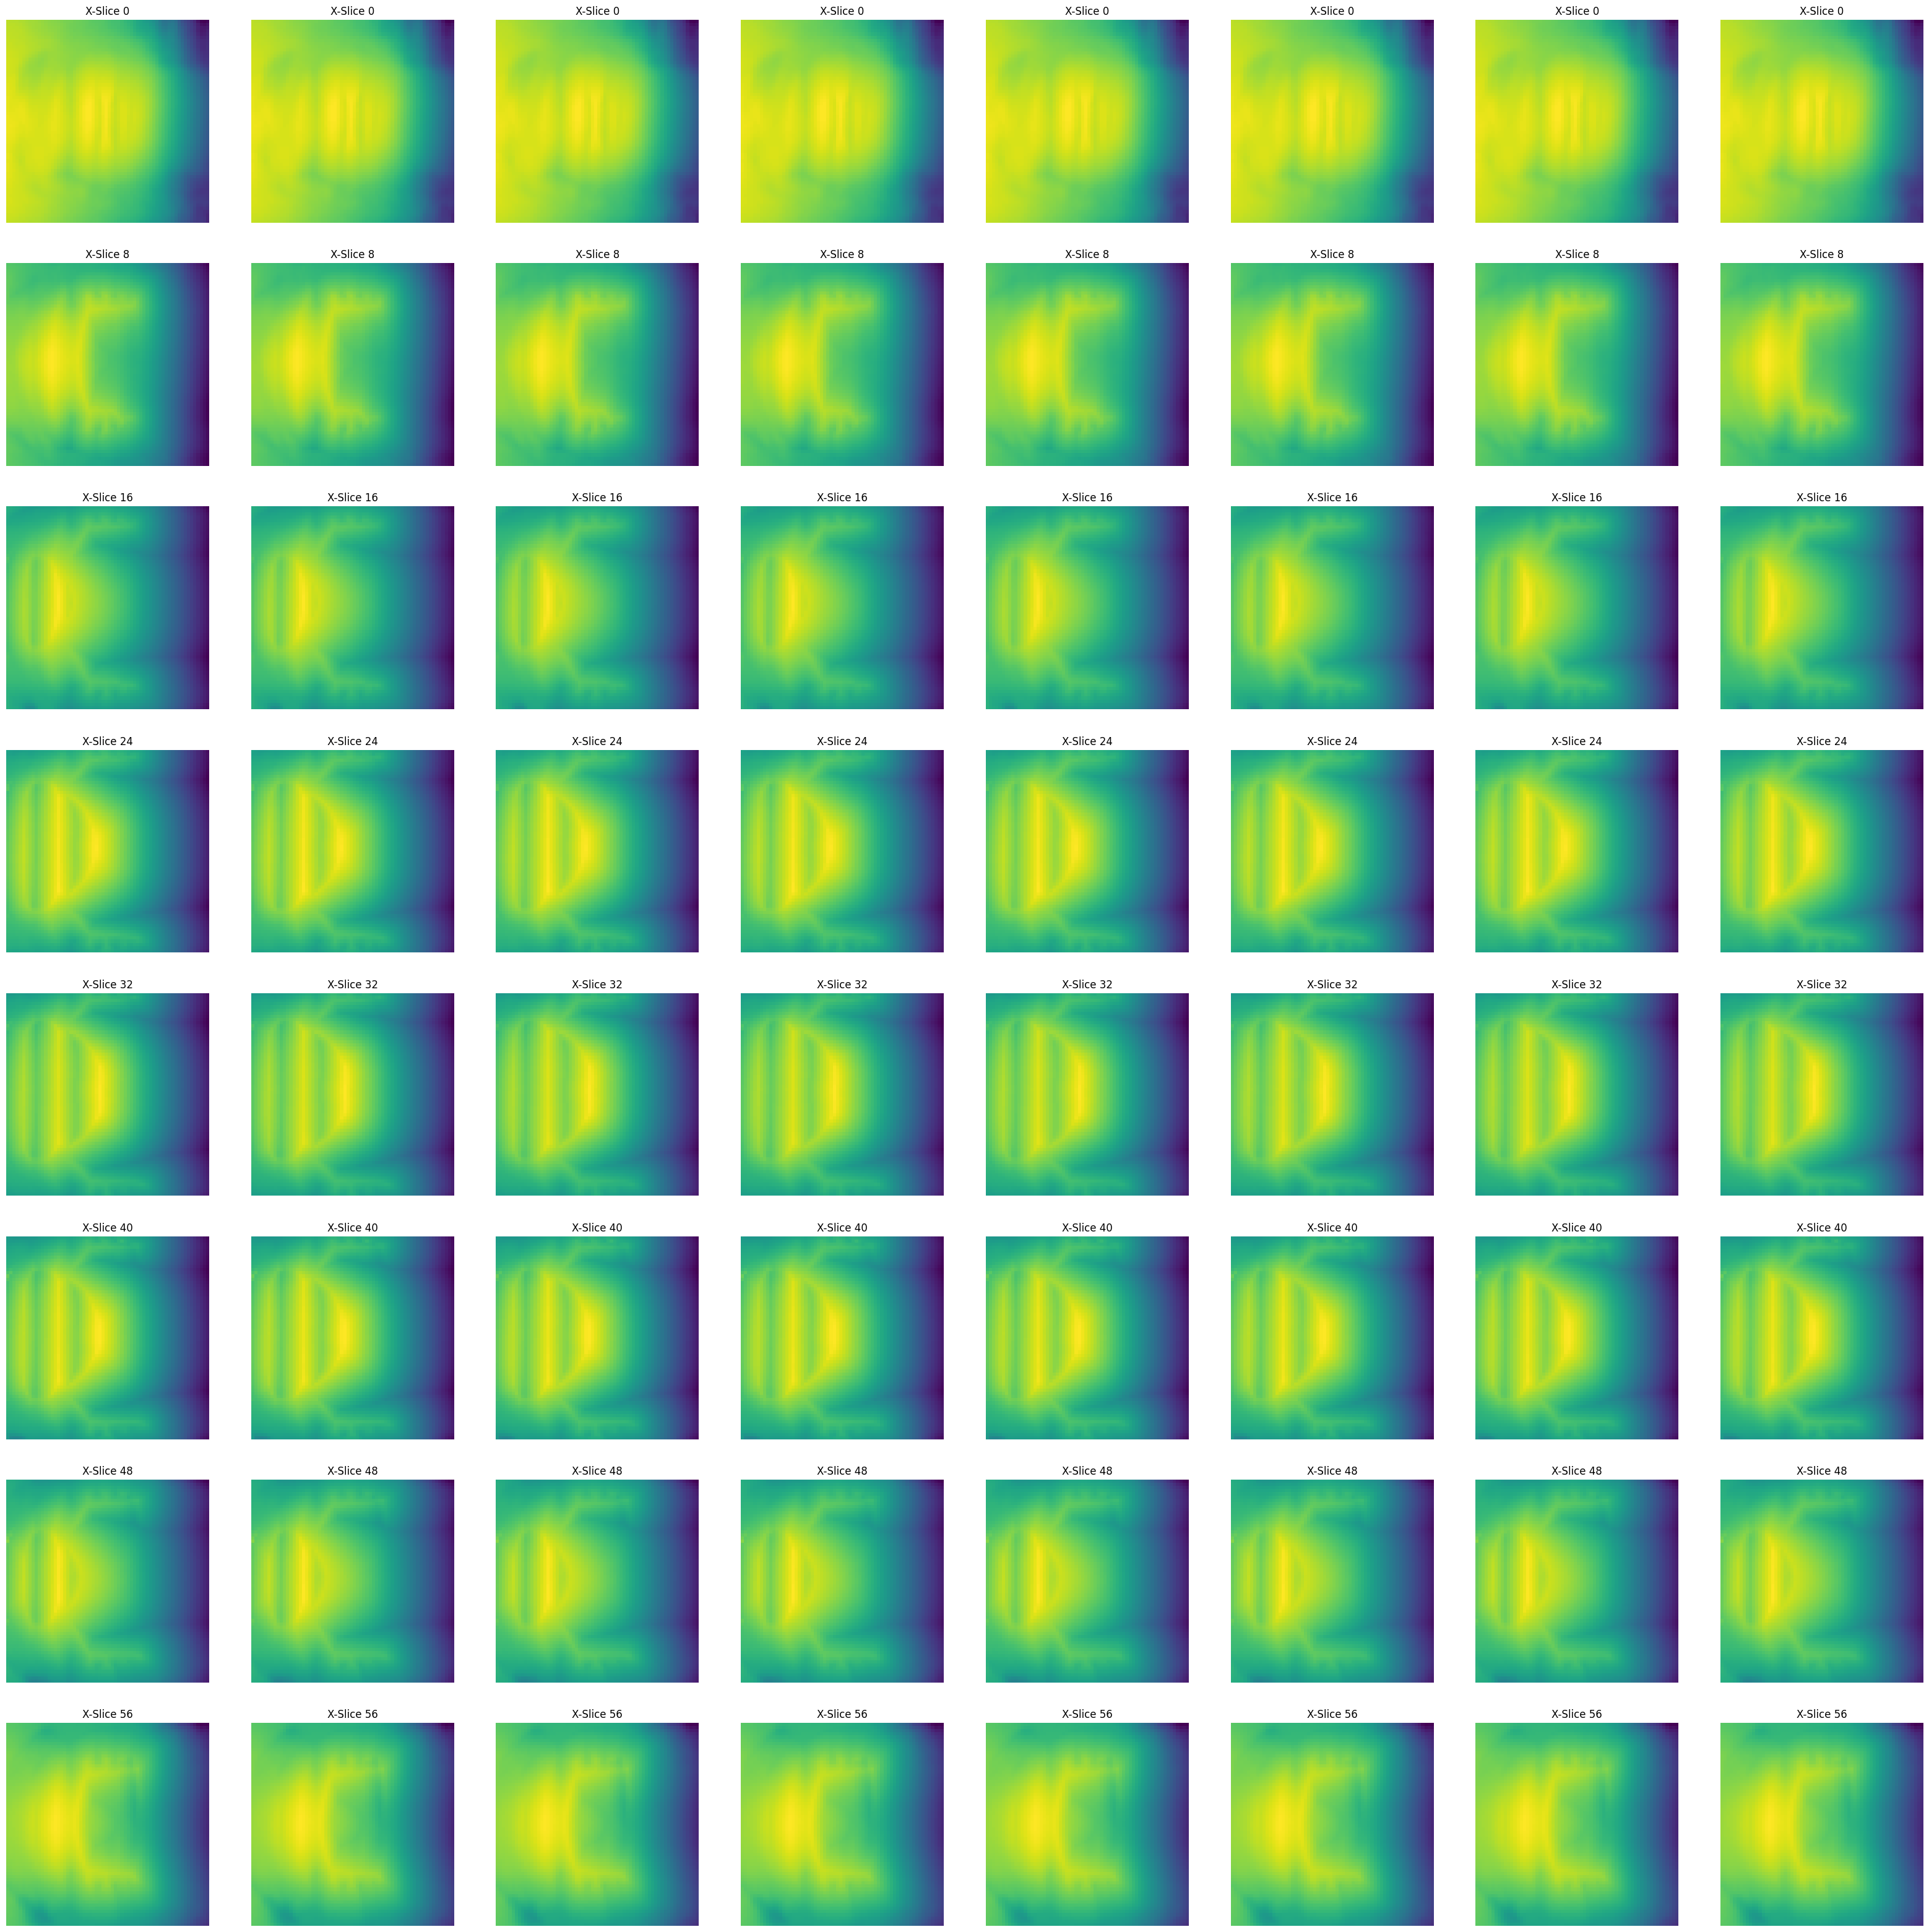

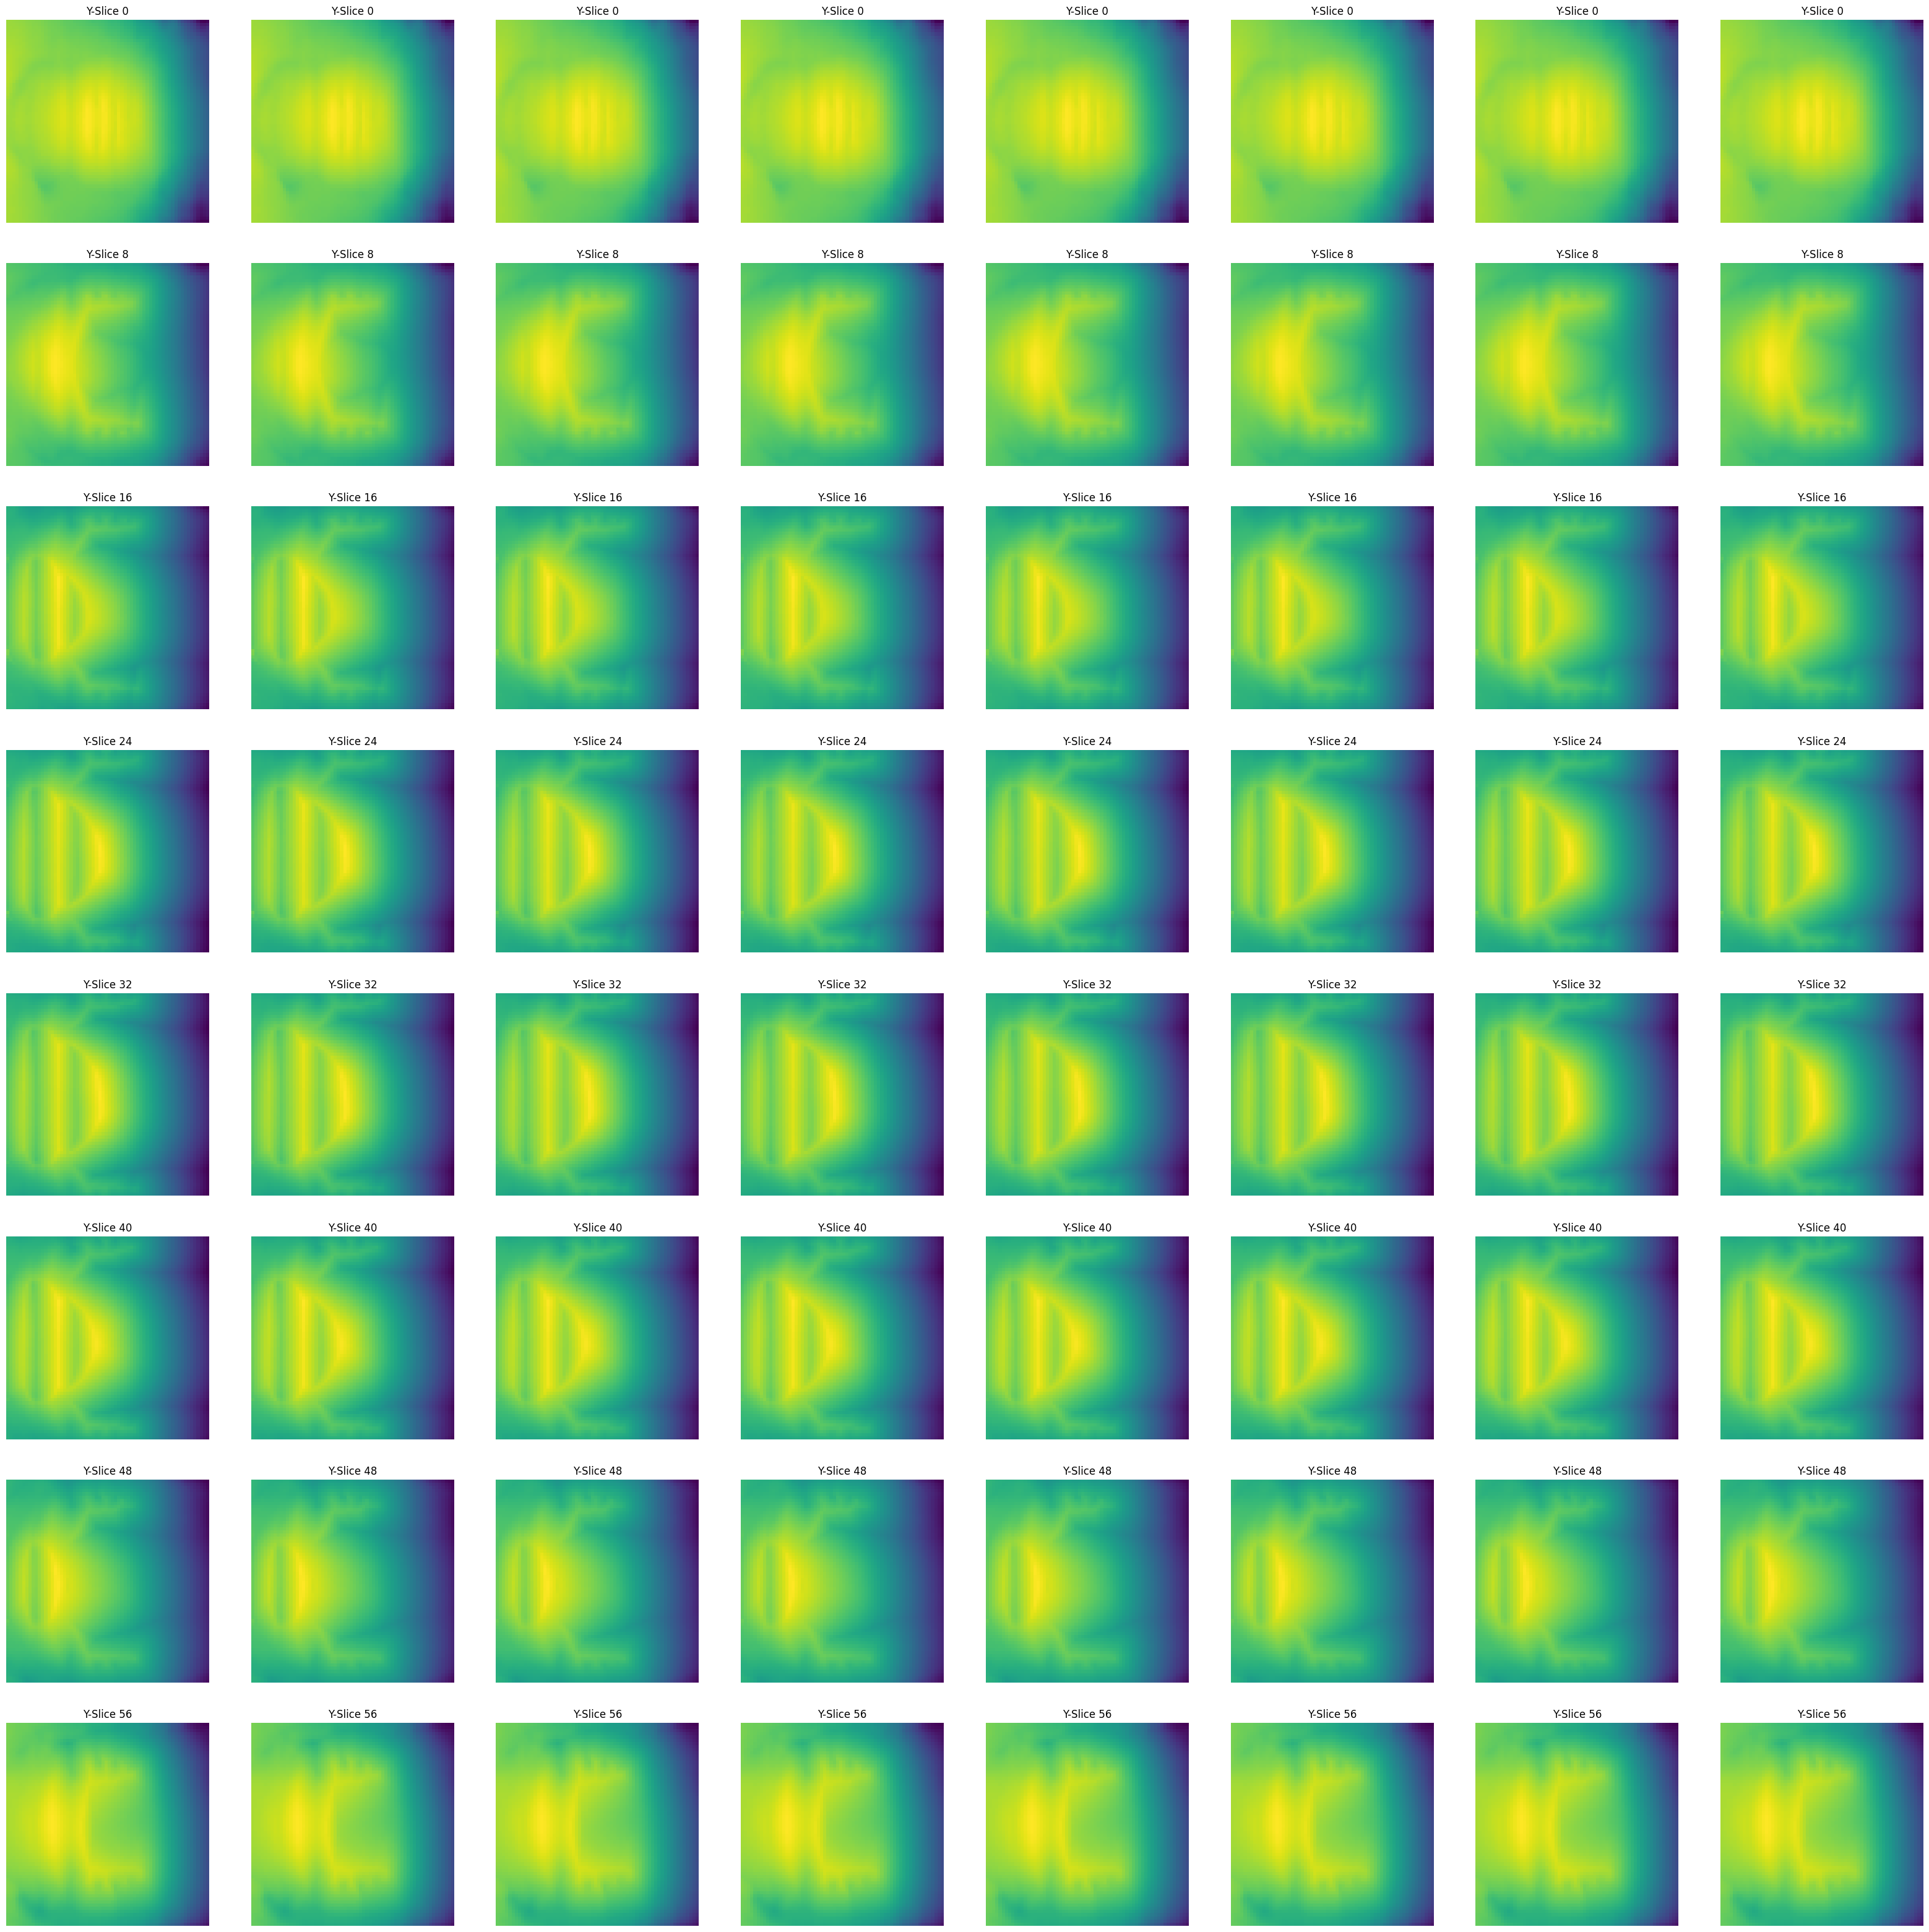

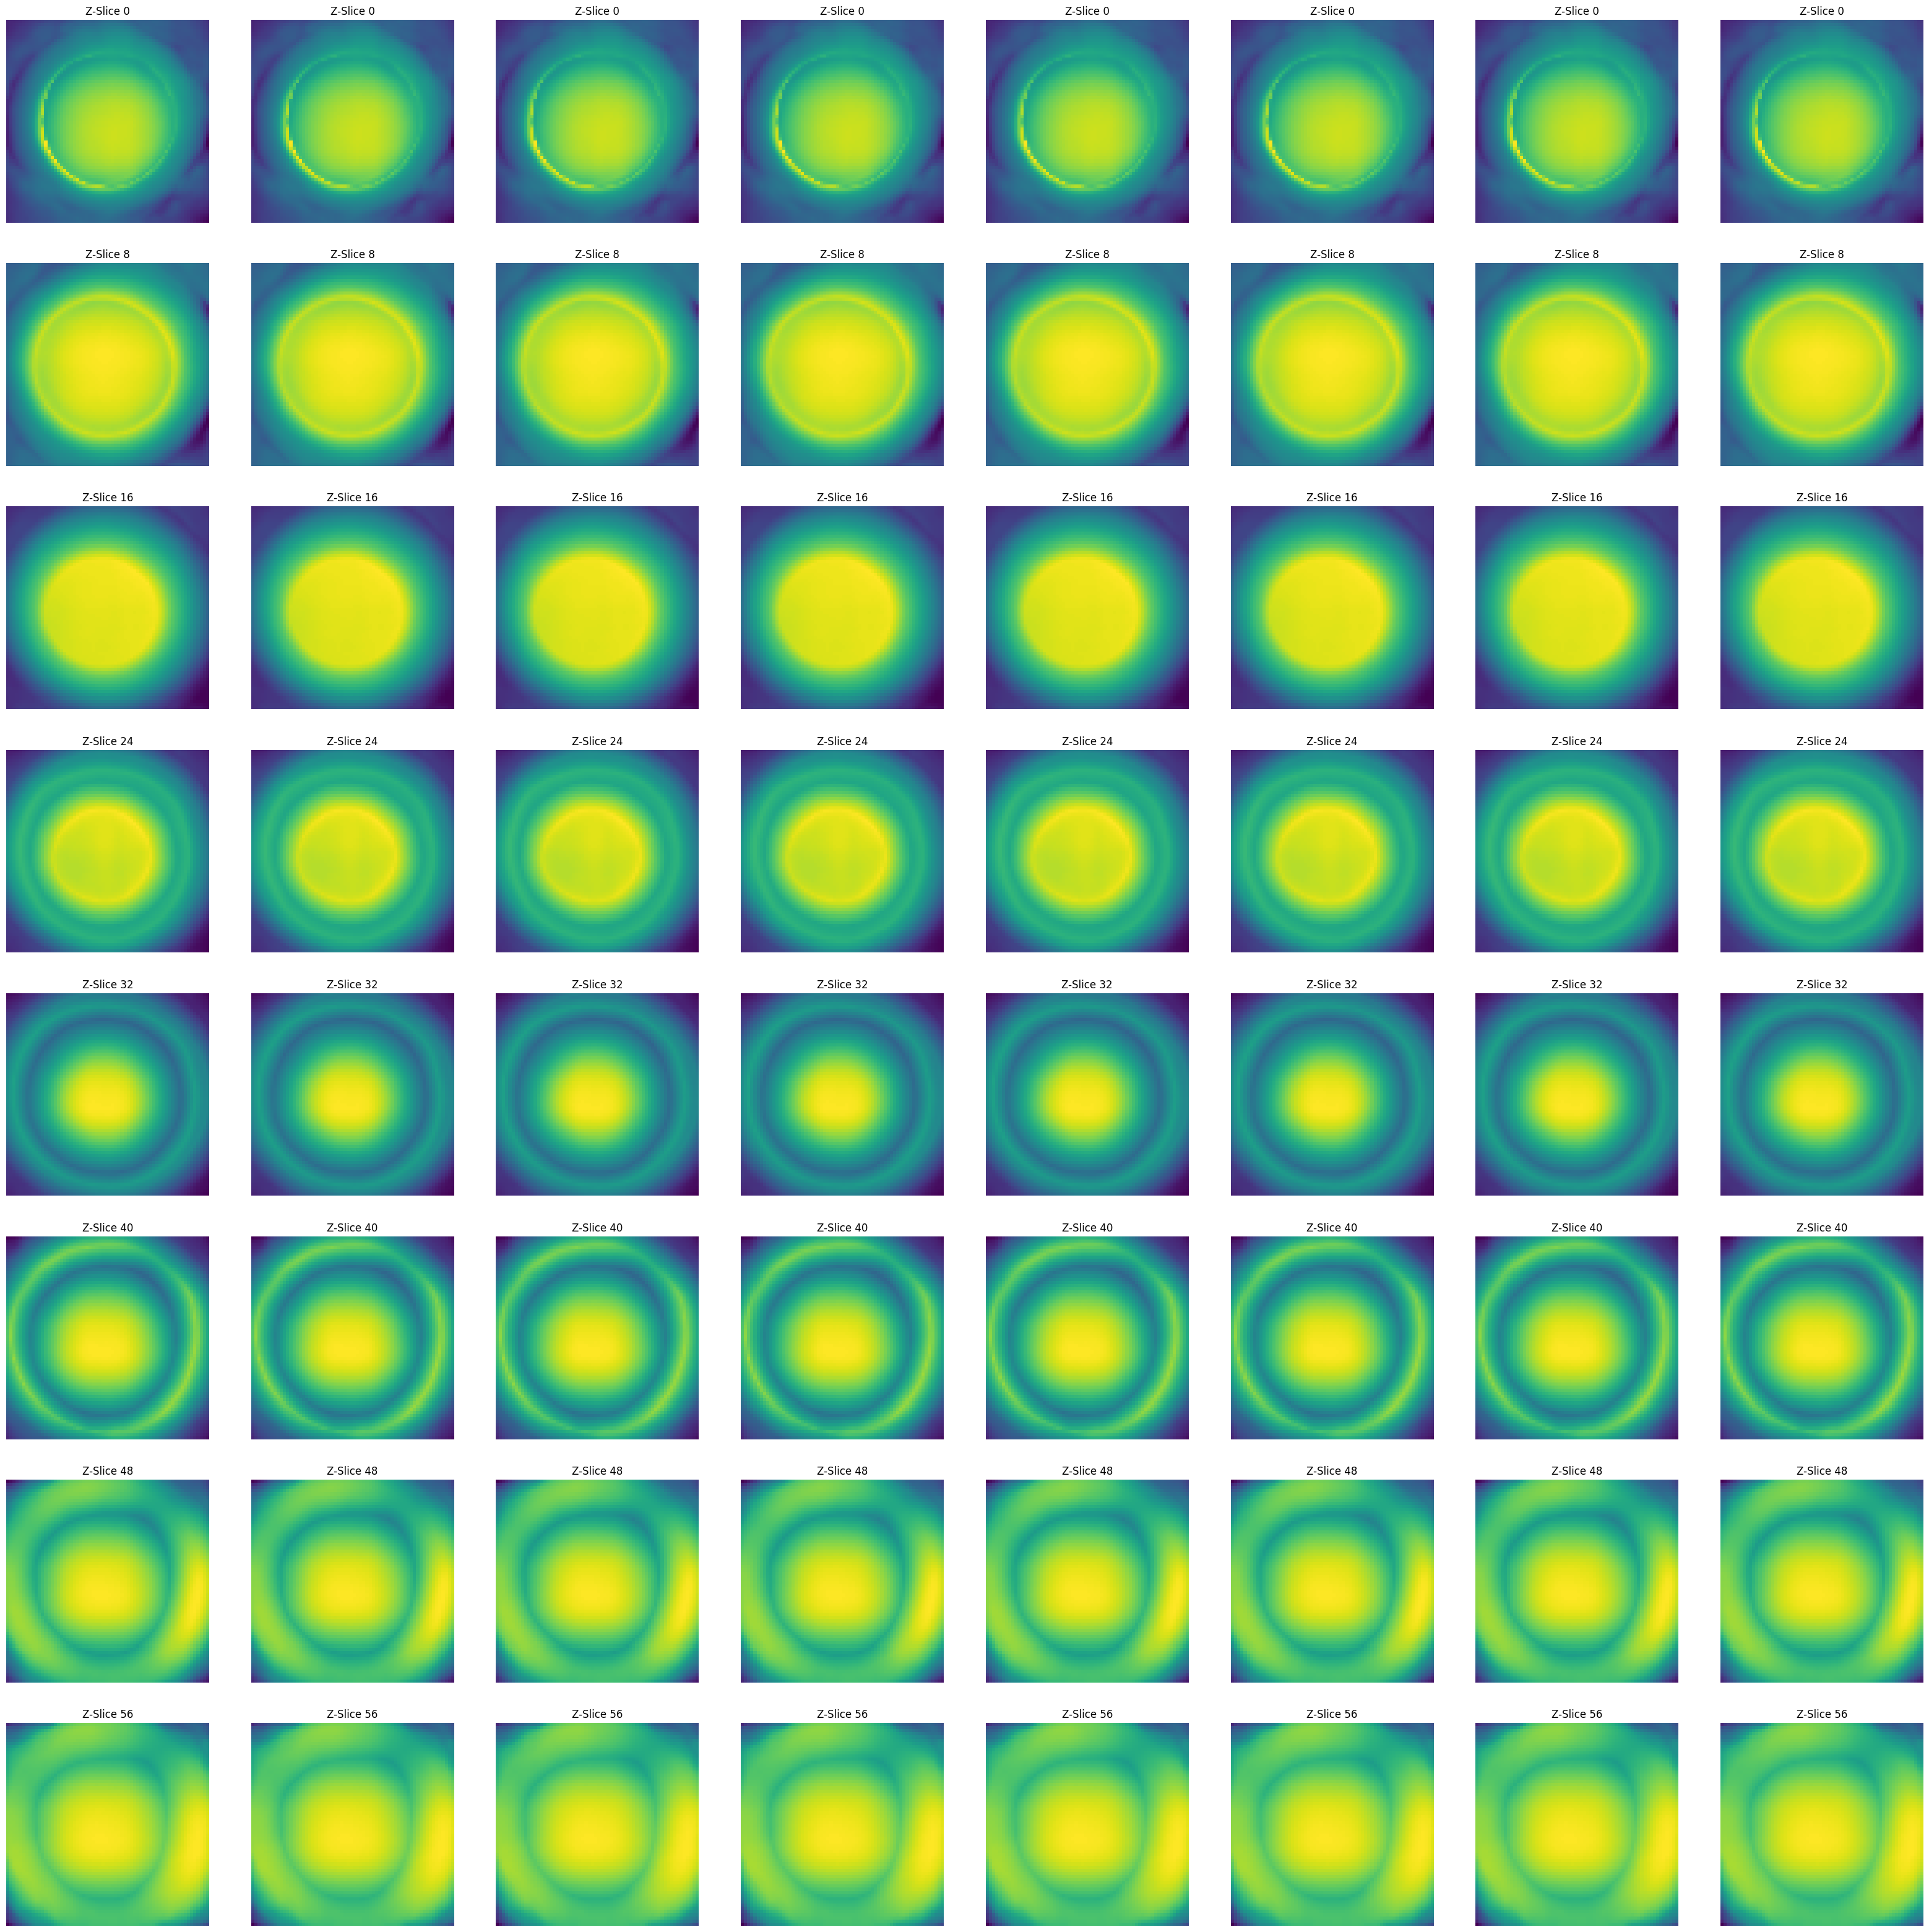

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 3D volume (you can replace this with your own data)
volume = volume_grid

# Plot slices in an 8x8 grid
def plot_slices(volume):
    num_slices = 8
    fig, axes = plt.subplots(num_slices, num_slices, figsize=(40, 40))

    # Plot slices along the X-axis
    for i in range(num_slices):
        for j in range(num_slices):
            slice_index = i * (volume.shape[0] // num_slices)
            axes[i, j].imshow(volume[slice_index, :, :], cmap='viridis')
            axes[i, j].set_title(f"X-Slice {slice_index}")
            axes[i, j].axis('off')

    plt.show()

    # Plot slices along the Y-axis
    fig, axes = plt.subplots(num_slices, num_slices, figsize=(40, 40))
    for i in range(num_slices):
        for j in range(num_slices):
            slice_index = i * (volume.shape[1] // num_slices)
            axes[i, j].imshow(volume[:, slice_index, :], cmap='viridis')
            axes[i, j].set_title(f"Y-Slice {slice_index}")
            axes[i, j].axis('off')

    plt.show()

    # Plot slices along the Z-axis
    fig, axes = plt.subplots(num_slices, num_slices, figsize=(40, 40))
    for i in range(num_slices):
        for j in range(num_slices):
            slice_index = i * (volume.shape[2] // num_slices)
            axes[i, j].imshow(volume[:, :, slice_index], cmap='viridis')
            axes[i, j].set_title(f"Z-Slice {slice_index}")
            axes[i, j].axis('off')

    plt.show()

# Call the function to plot slices
plot_slices(volume)


In [5]:
!wget  http://roboimagedata2.compute.dtu.dk/data/MVS/SampleSet.zip

--2024-01-29 16:17:45--  http://roboimagedata2.compute.dtu.dk/data/MVS/SampleSet.zip
Resolving roboimagedata2.compute.dtu.dk (roboimagedata2.compute.dtu.dk)... 130.225.69.128
Connecting to roboimagedata2.compute.dtu.dk (roboimagedata2.compute.dtu.dk)|130.225.69.128|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://roboimagedata2.compute.dtu.dk/data/MVS/SampleSet.zip [following]
--2024-01-29 16:17:46--  https://roboimagedata2.compute.dtu.dk/data/MVS/SampleSet.zip
Connecting to roboimagedata2.compute.dtu.dk (roboimagedata2.compute.dtu.dk)|130.225.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6905656531 (6.4G) [application/zip]
Saving to: ‘SampleSet.zip’

SampleSet.zip       100%[===================>]   6.43G  3.31MB/s    in 21m 9s  

2024-01-29 16:38:56 (5.19 MB/s) - ‘SampleSet.zip’ saved [6905656531/6905656531]



In [8]:
# !unzip SampleSet.zip

In [10]:
dict(np.load('/home/ojaswa/aarya/research_papers_implementation/idr/data/DTU/scan105/cameras.npz'))

{'scale_mat_0': array([[314.36035 ,   0.      ,   0.      , -59.271263],
        [  0.      , 314.36035 ,   0.      , -27.21828 ],
        [  0.      ,   0.      , 314.36035 , 685.02374 ],
        [  0.      ,   0.      ,   0.      ,   1.      ]], dtype=float32),
 'scale_mat_inv_0': array([[ 0.00318106,  0.        ,  0.        ,  0.1885456 ],
        [ 0.        ,  0.00318106,  0.        ,  0.08658306],
        [ 0.        ,  0.        ,  0.00318106, -2.1791036 ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'world_mat_0': array([[ 2.6074299e+03, -3.8448980e+00,  1.4981781e+03, -5.3393669e+05],
        [-1.9207690e+02,  2.8625525e+03,  6.8179816e+02,  2.3434688e+04],
        [-2.4160500e-01, -3.0951001e-02,  9.6988100e-01,  2.2540121e+01],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
       dtype=float32),
 'world_mat_inv_0': array([[ 3.3546050e-04, -5.1133857e-06, -5.1459229e-01,  1.9083348e+02],
        [ 2.58611

In [7]:
np.load('/home/ojaswa/aarya/research_papers_implementation/NeuS/public_data/DTU/dtu_scan24/cameras_sphere.npz')

NpzFile '/home/ojaswa/aarya/research_papers_implementation/NeuS/public_data/DTU/dtu_scan24/cameras_sphere.npz' with keys: scale_mat_0, scale_mat_inv_0, world_mat_0, world_mat_inv_0, camera_mat_0...

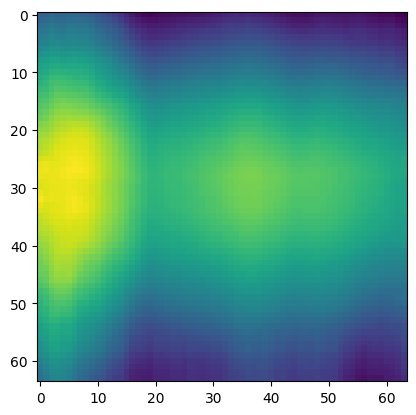

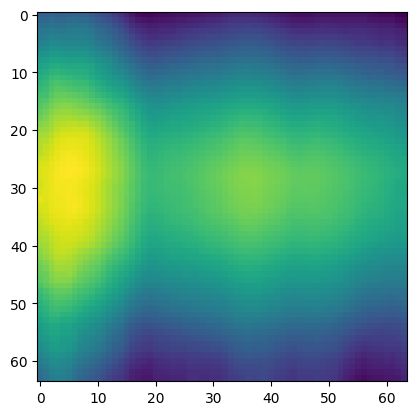

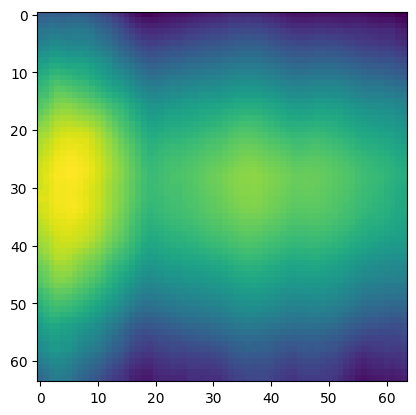

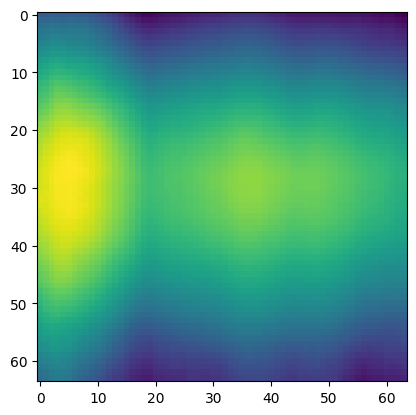

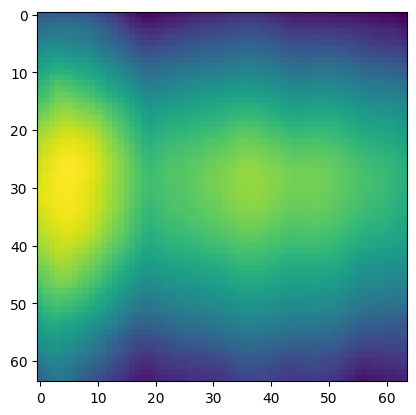

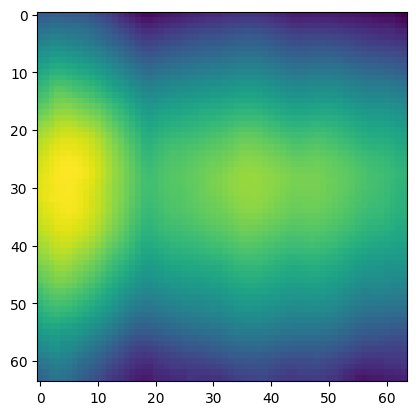

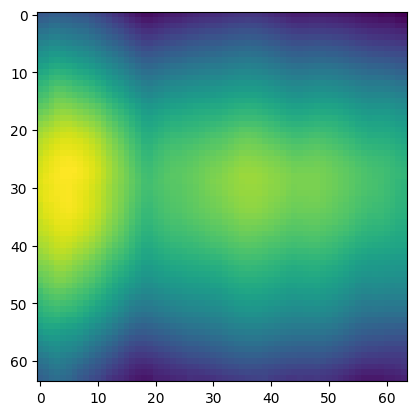

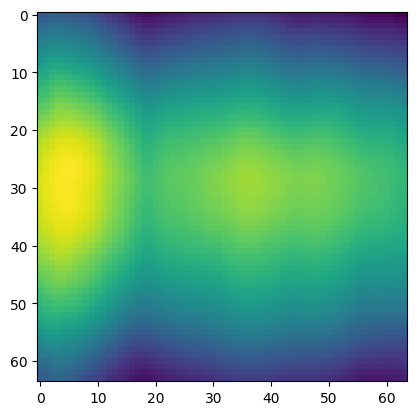

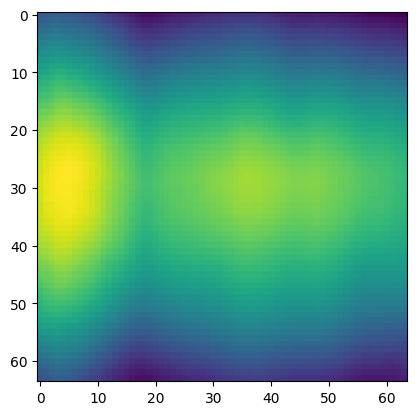

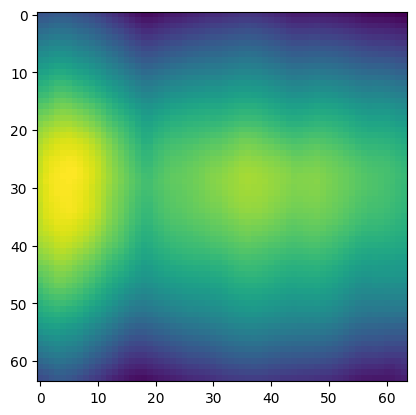

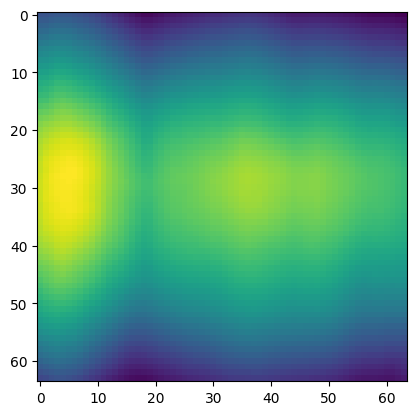

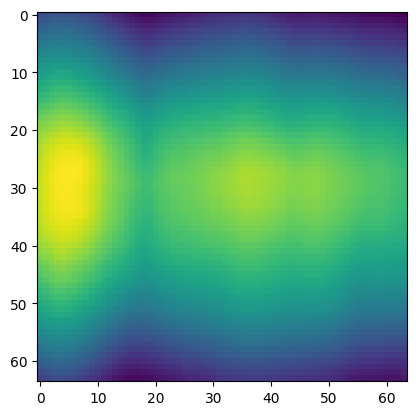

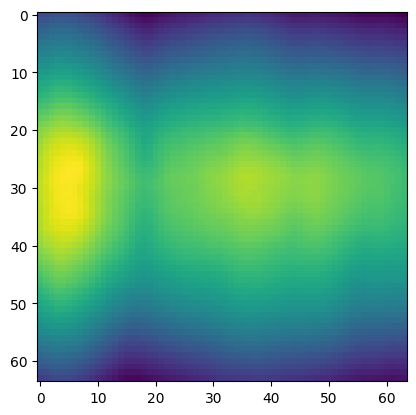

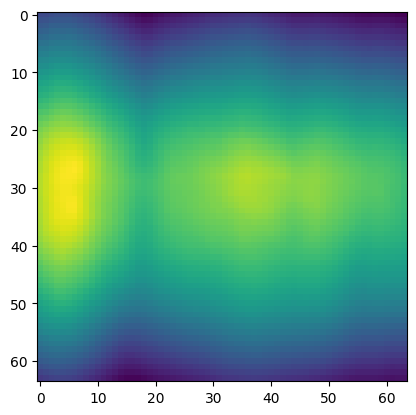

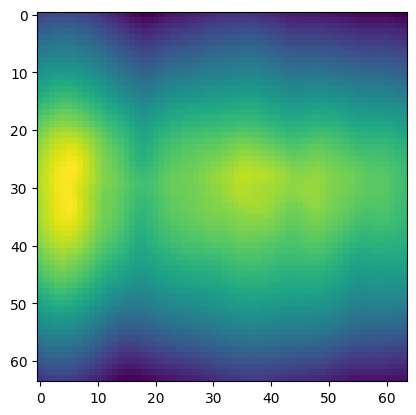

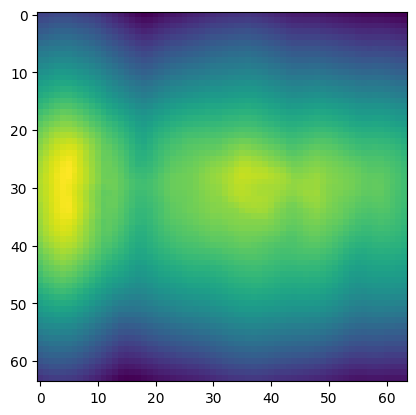

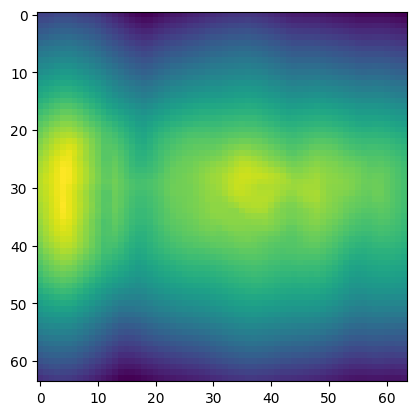

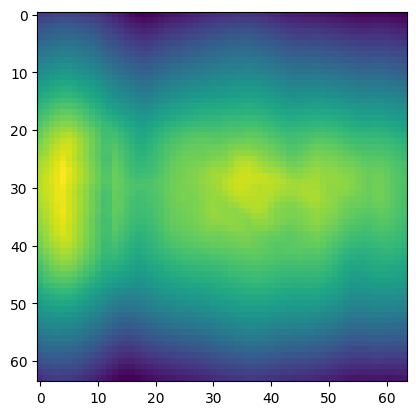

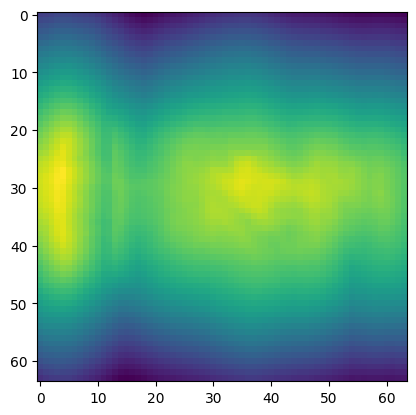

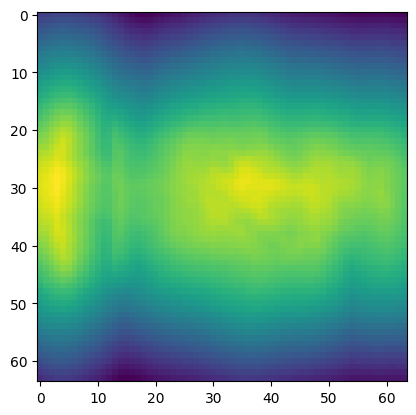

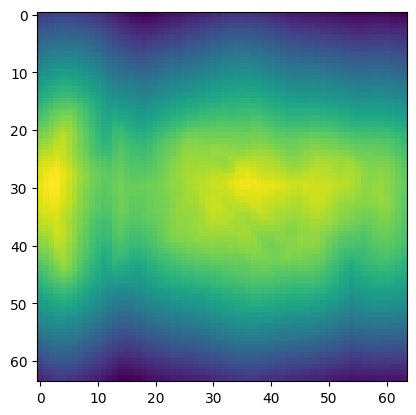

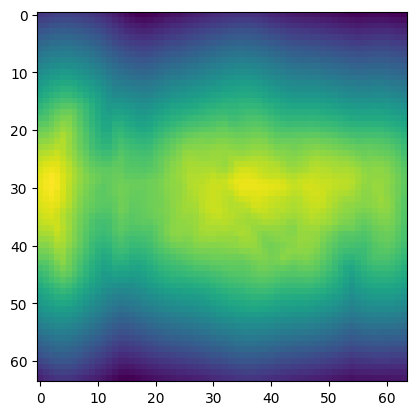

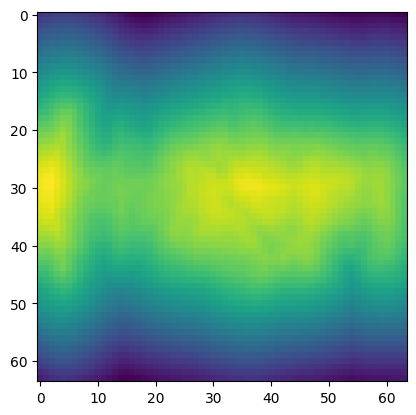

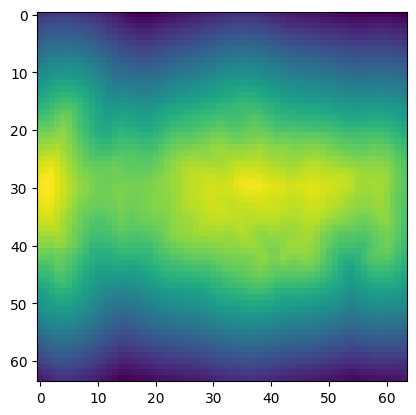

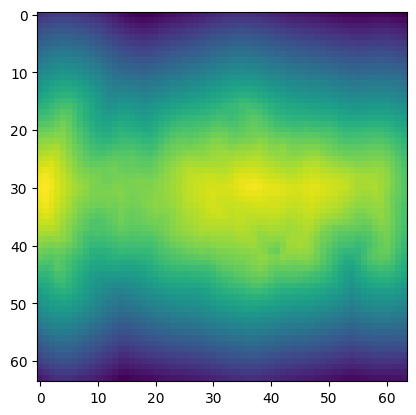

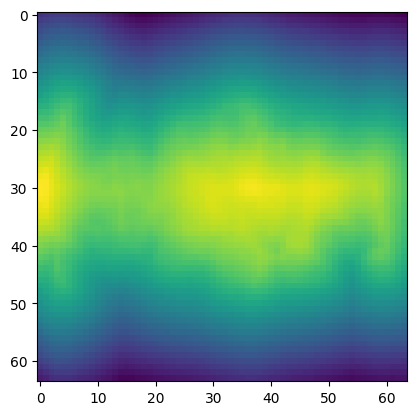

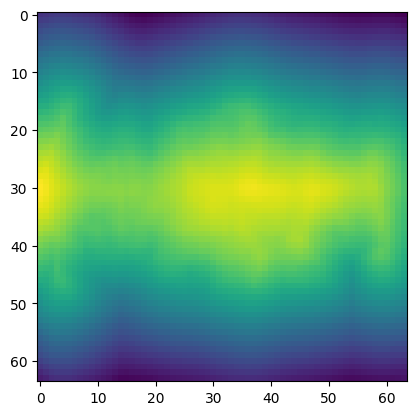

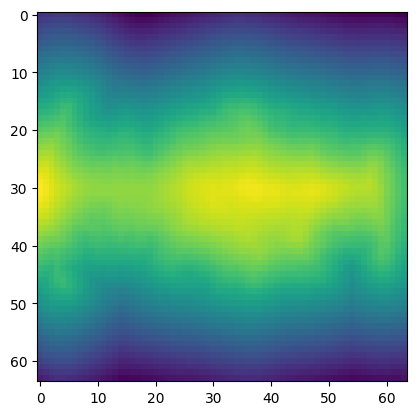

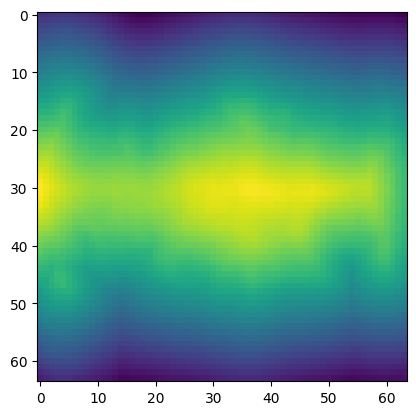

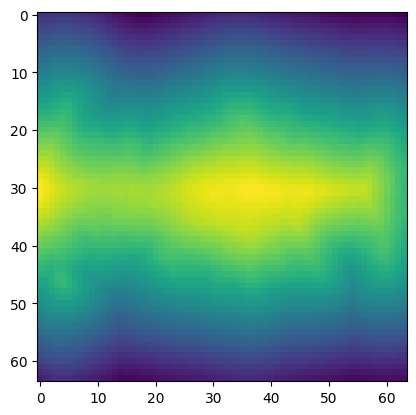

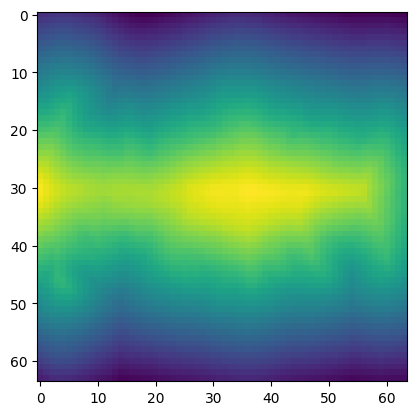

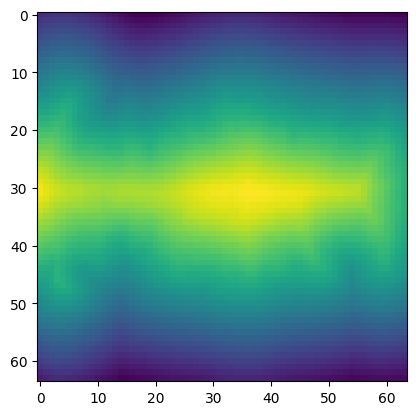

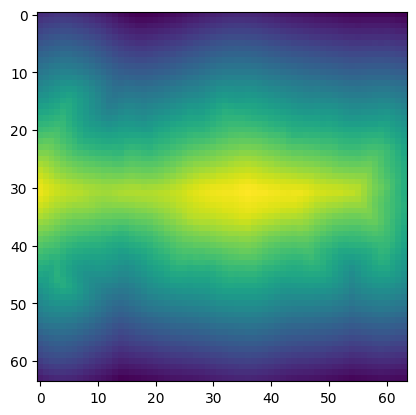

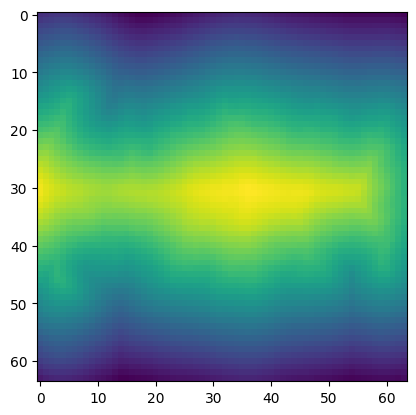

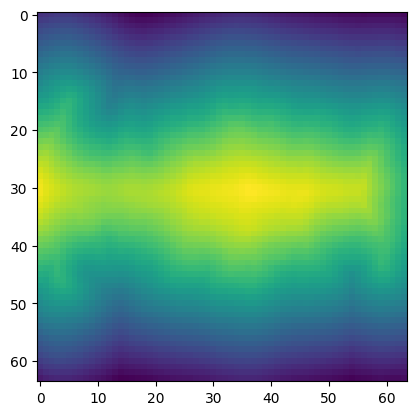

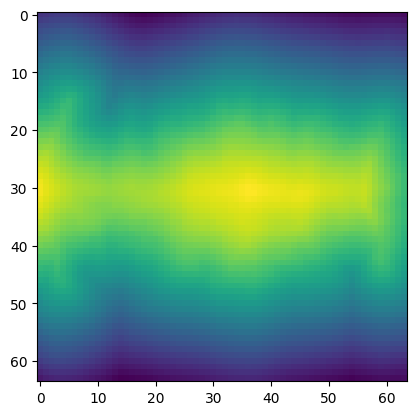

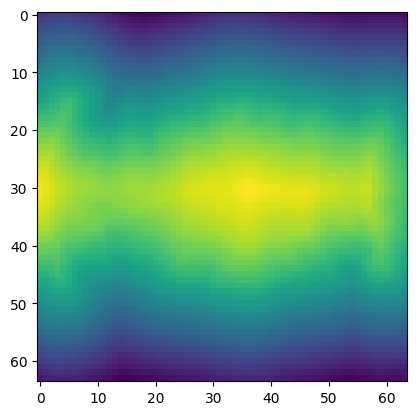

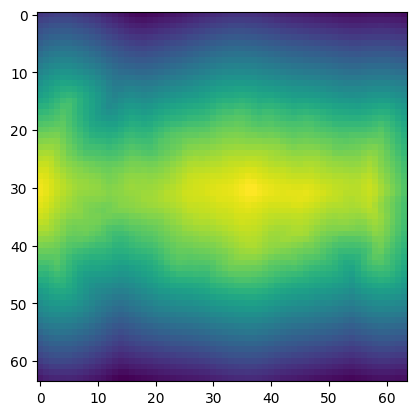

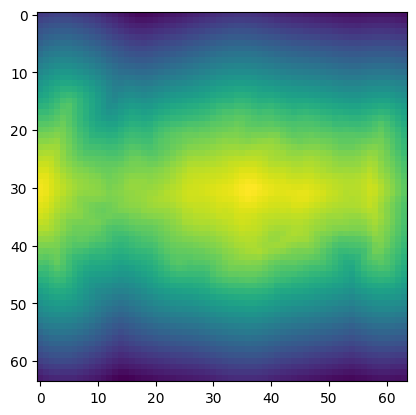

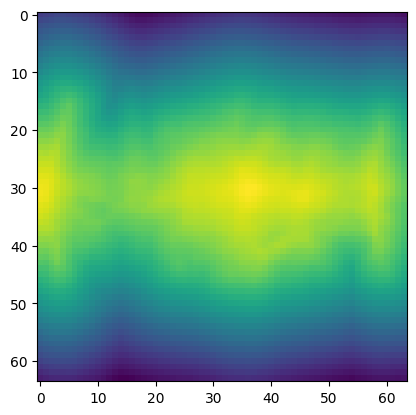

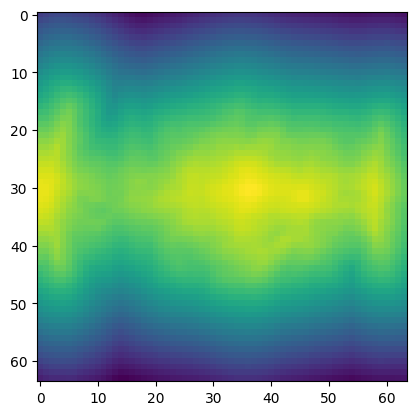

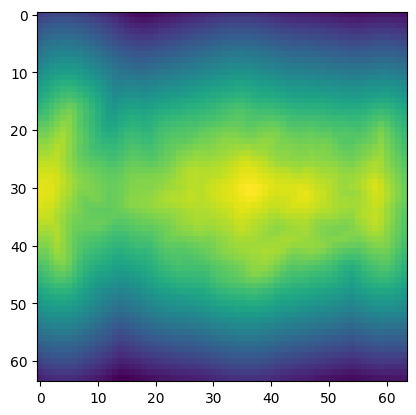

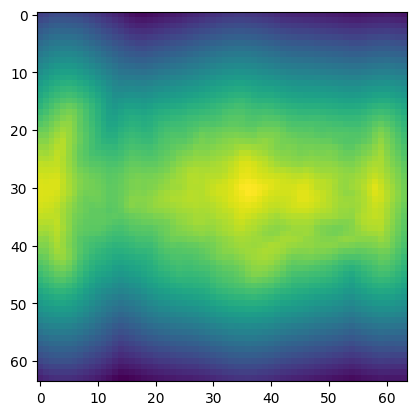

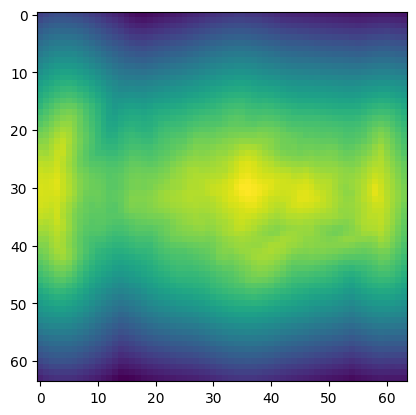

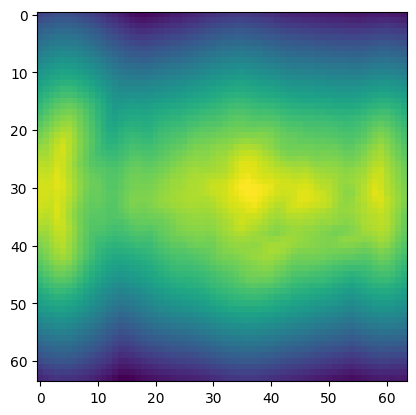

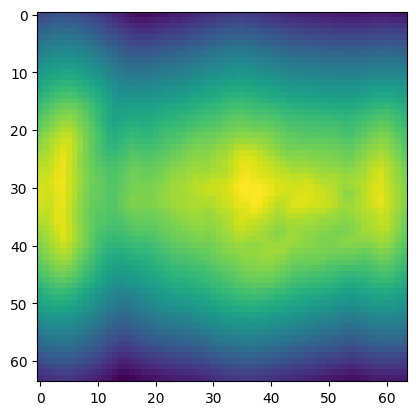

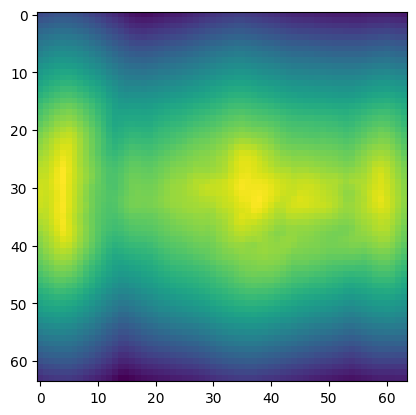

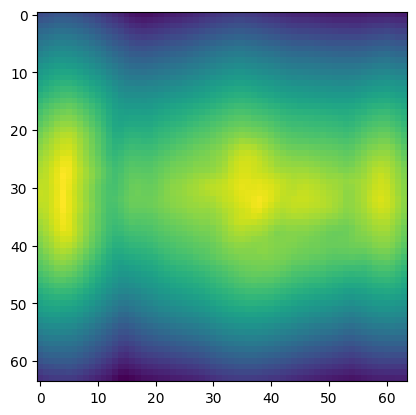

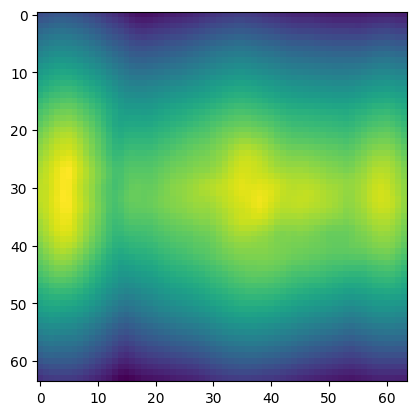

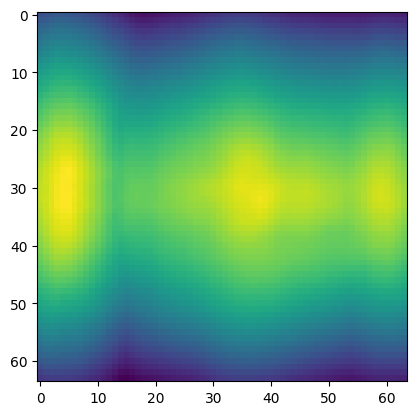

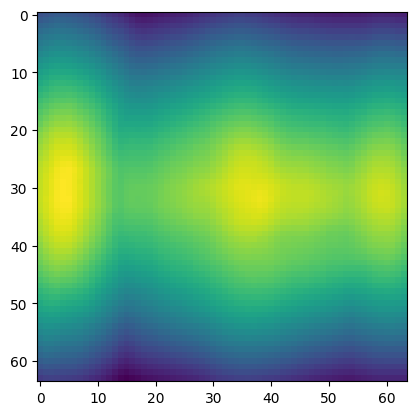

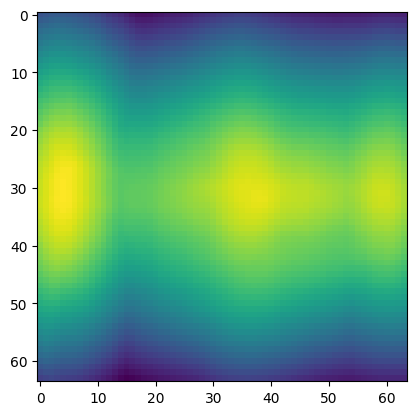

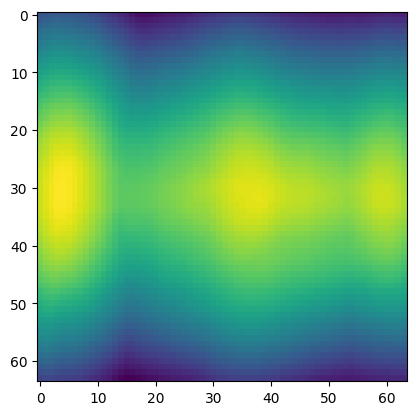

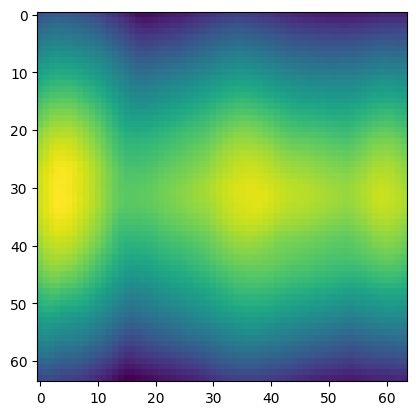

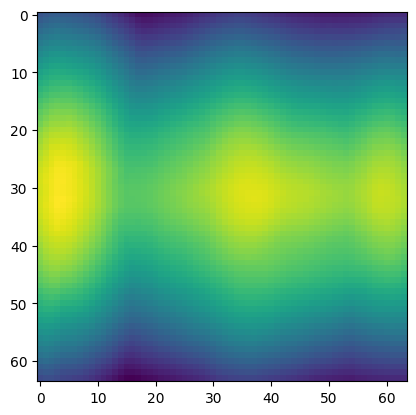

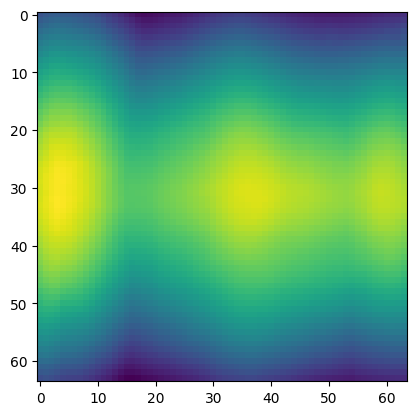

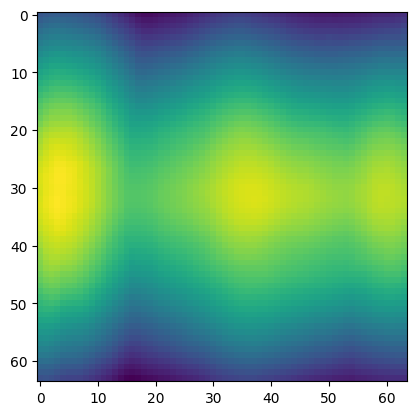

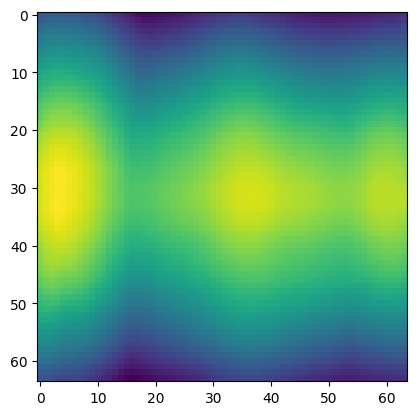

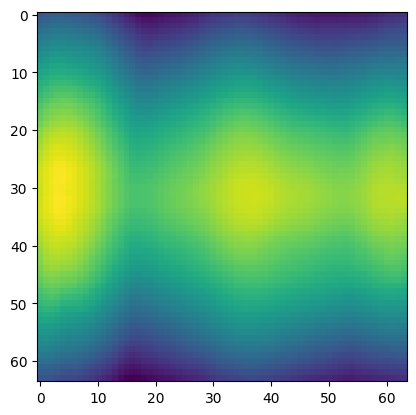

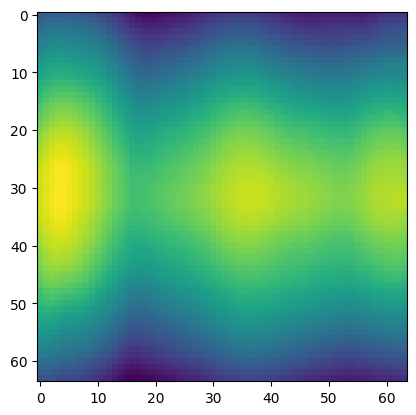

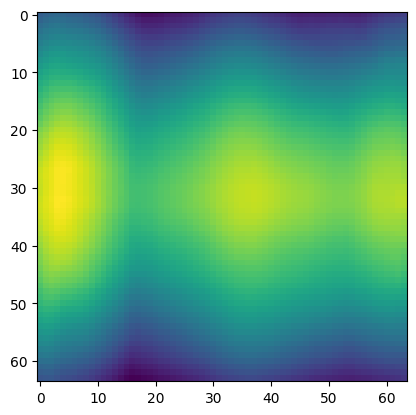

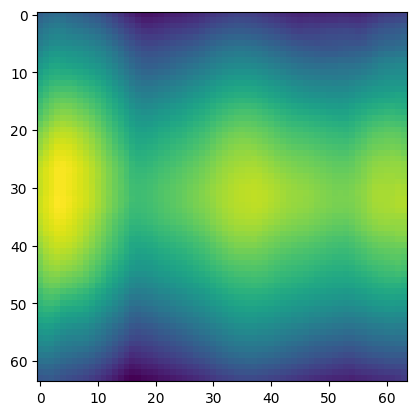

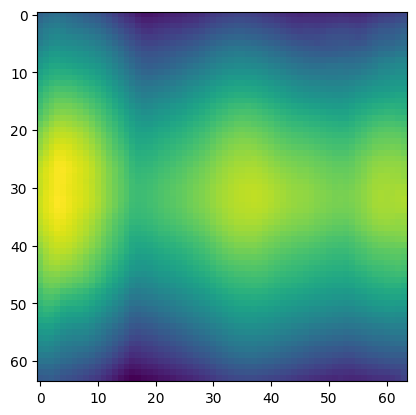

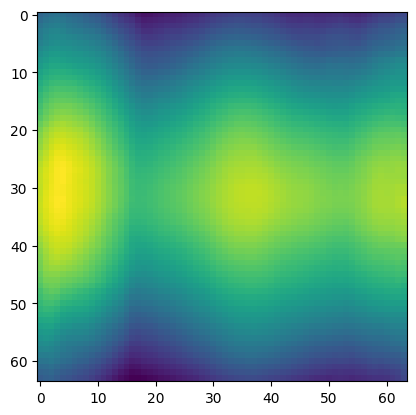

In [7]:
for i in range(volume_grid.shape[0]):
    plt.imshow(volume_grid[:, i, :])
    plt.show()
        

In [9]:
import cv2
cv2.imread('/home/ojaswa/aarya/research_papers_implementation/NeuS/public_data/dataset/buddha/mask/view_01.png').shape

(400, 400, 3)

In [20]:
a = np.random.rand(2, 2, 3)
print(a)

[[[0.61786611 0.19435903 0.36992902]
  [0.61999061 0.16240028 0.07256779]]

 [[0.35420595 0.25746472 0.7200746 ]
  [0.61363317 0.43750369 0.66194518]]]


In [25]:
np.where(a.max(axis=2) > 0.7)

(array([1]), array([0]))

In [2]:
import trimesh
import numpy as np

# Create a colored sphere mesh
sphere_radius = 1.0
num_latitude = 30
num_longitude = 30

# Create sphere vertices and faces
mesh = trimesh.creation.icosphere(subdivisions=5, radius=sphere_radius)

vertices = mesh.vertices
faces = mesh.faces

# Assign colors to vertices (random colors for demonstration)
# vertex_colors = np.random.rand(len(vertices), 3)
# assign red color to all vertices
vertex_colors = np.array([[255, 255, 0]] * len(vertices))

# Create a colored mesh
colored_sphere = trimesh.Trimesh(vertices=vertices, faces=faces, vertex_colors=vertex_colors)

# Visualize the mesh
colored_sphere.show()


In [14]:
vertex_colors

array([[1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       ...,
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]])

In [21]:
import cv2
normal = cv2.imread('/home/ojaswa/aarya/research_papers_implementation/NeuS/public_data/dummy/sphere/normal/normal_0000.png').astype(np.float32)
normal /= 255.
normal = normal * 2 - 1

normal /= np.linalg.norm(normal, axis=2, keepdims=True)
normal

array([[[-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026],
        ...,
        [-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026]],

       [[-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026],
        ...,
        [-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026]],

       [[-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026],
        ...,
        [-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026],
        [-0.57735026, -0.57735026, -0.57735026]],

       ...,

       [[-0.57735026, -0.57735026, -0.57735026],
        [-0

In [19]:
n_values = normal[np.all(normal != [-1, -1, -1], axis=-1)]
n_values

array([[0.81960785, 0.5058824 , 0.7647059 ],
       [0.8117647 , 0.5058824 , 0.77254903],
       [0.6313726 , 0.0196079 , 0.56078434],
       ...,
       [0.27843142, 0.94509804, 0.45098042],
       [0.6392157 , 0.96862745, 0.73333335],
       [0.64705884, 0.9764706 , 0.7411765 ]], dtype=float32)

In [20]:
np.linalg.norm(n_values, axis=-1)

array([1.2298167 , 1.2295166 , 0.84468627, ..., 1.0835671 , 1.3728123 ,
       1.3861899 ], dtype=float32)

In [10]:
volume_grid.max()

0.33242768

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [34]:
normal_img = cv2.imread('/home/ojaswa/aarya/research_papers_implementation/NeuS/public_data/dataset/armadillo/normal/img/view_15.png')
# normal_img[normal_img != 0]

In [35]:
normal_npy = np.load('/home/ojaswa/aarya/research_papers_implementation/NeuS/public_data/dataset/armadillo/normal/npy/view_15.npy')

In [36]:
# values not equal to 0
normal_npy[200, 200, :]

array([-0.3330078 ,  0.28271484,  0.89941406], dtype=float32)

In [38]:
np.linalg.norm(normal_img[200, 200, :] / 255.0)

1.177065209208131

In [41]:
import numpy as np  



1.0